### Loading  Training and Testing Dataset

In [7]:
import pandas as pd
import numpy as np

Training and Testing:
- polarity : Target 2:positive, 1:neutral, 0:negative
- words : preprocessed sentences
- type : the tags of the words from lemmatizing 

Training:
- polarity : Target 2:positive, 1:neutral, 0:negative
- words : preprocessed sentences
- type : the tags of the words from lemmatizing 

As I was loading the data I found that there were null values appearing. When referring back, these values came from the cleaning process and were converted to Null values when they were saved to csv. 

In [8]:
training = training.dropna()
training = training.reset_index(drop=True)
print training.isnull().sum()
training.head()

polarity     0
sentence     0
lem_words    0
lem_type     0
dtype: int64


,polarity,sentence,lem_words,lem_type
0,1.0,"those rolls were big, but not good and sashimi...",roll be big not good sashimi be not fresh,NN VB JJ RB JJ NN VB RB JJ
1,1.0,Service is average.,service be average,NN VB JJ
2,1.0,"Food was very good, but not what I would consi...",food be very good not consider world,NN VB RB JJ RB VB NN
3,1.0,The service was friendly and the atmosphere wa...,service be friendly atmosphere be casual,NN VB JJ NN VB JJ
4,1.0,"So close, but not good enough.",so close not good enough,RB JJ RB JJ JJ


In [9]:
testing.head()

,polarity,sentence,lem_words,lem_type
0,0.0,They refuse to seat parties of 3 or more on we...,refuse seat party more weekend,VB NN NN JJ NN
1,2.0,This is a nice pizza place with good selection...,be nice pizza place good selection thin crust ...,VB JJ NN NN JJ NN JJ NN NN VB NN NN
2,2.0,Indoor was very cozy and cute.,indoor be very cozy cute,JJ VB RB JJ JJ
3,2.0,The view is breathtaking the service is top no...,view be breathtaking service be top notch ambi...,NN VB JJ NN VB JJ NN NN VB JJ
4,2.0,This is a nice restaurant if you are looking f...,be nice restaurant be look good place host int...,VB JJ NN VB VB JJ NN NN JJ NN NN NN NN


In [10]:
X_train = training['lem_words']
y_train = training['polarity']

X_test = testing['lem_words']
y_test = testing['polarity']

print X_test.shape, X_train.shape
print y_test.shape, y_train.shape

(496,) (3000,)
(496,) (3000,)


### Baseline Accuracy
- The baseline accuracy is the proportion of the majority class. In this case '2' which is positive sentiment and so the baseline accuracy is 0.333556

baseline_accuracy = majority class N / total N


In [11]:
print y_train.value_counts(normalize=True)
baseline = 0.3


0.0    0.333333
2.0    0.333333
1.0    0.333333
Name: polarity, dtype: float64


## Feature Transformation for Training Data
- Count Vectorizer and TFIDF Vectorizer are both are used to compare the best fitting thus, choosing which transformer is best aporopriate.
- Logistic Regression is the classifier used to measure this. 
Logistic regression is a very fast classifier???


In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=1)


### Count Vectorizer on Training

In [15]:
# this is what i did before!
# fit on test too
# X_test_cvec = cvec.transform(X_test)
# # fit with Logistic Regression
# lr.fit(X_train_cvec, y_train)
# # predict with LR
# y_pred_cvec = lr.predict(X_test_cvec)
# cvec_score  = accuracy_score(y_test, y_pred_cvec)
# cvec_

0.7903225806451613

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
# initalise the vectoriser 
cvec = CountVectorizer()
# fit the training data on the model
cvec.fit(X_train)

#transform training data into sparse matrix
X_train_cvec = cvec.transform(X_train)

# cross val score/ predict
cvec_score = cross_val_score(lr, X_train_cvec, y_train, cv=3)

We still have the same number of rows but the vectorization has converted every word, or what is believed to be a word, from our test data into a feature. This is like dummy coded variables for words except that we have counts rather than just occurances.???.... featured names of wueds frequency of the top highest words. 

#### COUNT VEC - Word Frequency 
matrix outputting the 10 most common words and how many times they appear 
- Feature matrix of word occurences 
- top 10 word most occuring words
- most important words

In [38]:
# df_cvec = pd.DataFrame(cvec_mat.todense(),columns=cvec.get_feature_names())
# word_freq = df_cvec.sum(axis=0).sort_values(ascending=False)[:10]
# word_freq

#### COUNT VEC - Zipf's law
It state that 
In a corpus of text, any words frequency is inversely proportional to its rank in the frequency table. 

Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation


Unsurprisingly, the word frequencies for the collected works of Alexandre Dumas appear to follow the predictions made by Zipf’s law! In this blog post, I’ll show you how to use bash and R to perform this simple analysis.


Plotting the word frequency distribution, we observe : what is thissssssssss? https://en.wikipedia.org/wiki/Zipf%27s_law 

In [ ]:
# import matplotlib.pyplot as plt
# word_freq.plot(kind='hist',
#             title='Number of words with a given number of appearances',
#             fontsize=14)
# plt.show()

### TfIdF (term frequency inverse document frequency)

In [ ]:
# BEFORE
# X_test_tvec = tvec.transform(X_test)
# fit with Logistic Regression
# lr.fit(X_train_tvec, y_train)
# # predict with LR
# y_pred_tvec = lr.predict(X_test_tvec)
# tvec_score  = accuracy_score(y_test, y_pred_tvec)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initalise the vectoriser 
tvec = TfidfVectorizer()
# fit the training data on the model
tvec.fit(X_train)

#transform training data into sparse matrix
X_train_tvec = tvec.transform(X_train)

# cross val score/ predict
tvec_score = cross_val_score(lr, X_train_tvec, y_train, cv=4)

### Comparing scores
- Both vectorizers increased the accuracy
- TFIFD has the highest so is the chosen Feature Transformer that I will be choosing for my test set 

Hyperparameters will also be tested for the transformer
Both sparse matrices from the feature transformers (count vectoriser and TFIDF) 


In [36]:
print 'baseline:', baseline
print 'count vectorizer score:', cvec_score.mean()
print 'tfidf vectorizer score:', tvec_score.mean()

baseline: 0.3
count vectorizer score: 0.9333375291459124
tfidf vectorizer score: 0.9173333333333333


In [82]:
print 'baseline:', baseline
print 'count vectorizer score:', cvec_score
print 'tfidf vectorizer score:', tvec_score

baseline: 0.333556
count vectorizer score: 0.7923387096774194
tfidf vectorizer score: 0.8125


## TFIFD Vectorizer Parameters

TF-IDF (term frequency–inverse document frequency)is a calculation to transform words into numbers. It takes into account the frequecy of a word in a given document and the frequency between documents. So if a term is common in most documents it is supressed and rare words  are given more influence showing they are highly specific for a particular document. 

To break it down:
Term Frequency: More frequent terms in a target article, the higher the score
Inverse Document Frequency: The more common in other articles, the lower the score

Mathematically, the importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

TFcalculationformuala...
$$
\mathrm{idf}(t, D) = 1+\log\left(\frac{1+N_\text{Documents}}{1+N_\text{Documents that contain term}}\right)
$$


$$
\text{tf-idf}(t,d,D) = \mathrm{tf}(t,d) \cdot \mathrm{idf}(t, D)
$$

In [109]:
# testing params of tfifd 
tvec_p = TfidfVectorizer()
tvec_p.fit(X_train)

# transform to train and test 
X_train_mat = tvec_p.transform(X_train)
X_test_mat = tvec_p.transform(X_test)

# fit to LR, predict and score
lr.fit(X_train_tvec_p, y_train)
print 'Baseline:', baseline
print 'Default Params:', tvec_score
print 'Optimal Params:', accuracy_score(y_test, lr.predict(X_test_mat))
print "Number of features:", len(tvec.get_feature_names())

Baseline: 0.3
Default Params: 0.8125
Optimal Params: 0.8125
Number of features: 1480


 in theory the more/less max features???? show compare write

## k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print '------------------------------------\n'
    print 'K:', folds
    
    # Perform cross-validation
    scores = cross_val_score(lr, X[predictors], y, cv=folds)
    print "Cross-validated scores:", scores
    print "Mean CV R2:", np.mean(scores)
    print 'Std CV R2:', np.std(scores)
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X[predictors], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print "Cross-Predicted R2:", r2

# EDA

In [ ]:
# tvec_df  = pd.DataFrame(tvec.transform(training.words).todense(),
#                    columns=tvec.get_feature_names())
# tvec_df.sum(axis=0).sort_values(ascending=False)[:10]
# top words....

# Finding an Estimator
- Choosing an estimator which will perform at its optimum so can be tuned further.

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [110]:
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          KNeighborsClassifier(), 
          MultinomialNB(), 
          SGDClassifier()]

for model in models:
    print model
    
    model.fit(X_train_mat, y_train)
    y_pred = model.predict(X_test_mat)
    score = accuracy_score(y_test, y_pred)
    print score
    print '_'*70

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8125
______________________________________________________________________
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.7903225806451613
______________________________________________________________________
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, pro

With limited time I have chosen a localised method to choose my classifier

# Logistic Regression - GridSearchCV

Grid Search CV Logistic Regression
Logistic regression is a very fast classifier.
I am using grid search to find best hyperparameters.


In [85]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

### Logistic Regression

In [269]:
lr = LogisticRegression(random_state=1)
lr_params = {'penalty': ['l1','l2'],
          'solver':['liblinear'],
          'C': np.logspace(-10,10,21)}

lr_grid = GridSearchCV(lr, param_grid=lr_params, cv=5, n_jobs=-1, verbose=1)

# fit with the tranformed tfidf matrix as X
lr_grid.fit(X_train_mat, y_train)

print 'best on training:', lr_grid.best_score_

# assign the best estimator to a variable:
best_lr = lr_grid.best_estimator_
print 'best params:', lr_grid.best_params_


Fitting 5 folds for each of 42 candidates, totalling 210 fits
best on training: 0.9499666444296198
best params: {'penalty': 'l2', 'C': 10000000000.0, 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   10.6s finished


l2 is ridgeeeeeeee
- # Lasso was chosen: this indicates that maybe unimportant (noise) variables
- # is more of an issue in our data than multicollinearity.

# Evaluation LOOK UP CROSS VAL and ACCURACY....
## Confusions matirix and Classification Report 
- I will evaluate my model through showing the accuracy

In [338]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools

In [328]:
y_pred = best_lr.predict(X_test_mat)
# print both just to confirm
print 'best params on testing:', best_lr.score(X_test_mat, y_test), accuracy_score(y_test, y_pred)
print "Number of classification errors:", np.abs(y_pred - y_test).sum()

best params on testing: 0.8024193548387096 0.8024193548387096
Number of classification errors: 176.0


In [352]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [353]:
# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred)
confusion = pd.DataFrame(np.array(cm), index=['True_Negative', 'True_Neutral', 'True_Positive'], 
                         columns =['Pred_Negative', 'Pred_Neutral', 'Pred_Positive'])
confusion

,Pred_Negative,Pred_Neutral,Pred_Positive
True_Negative,81,5,32
True_Neutral,5,3,5
True_Positive,46,5,314


Confusion matrix, without normalization
[[ 81   5  32]
 [  5   3   5]
 [ 46   5 314]]


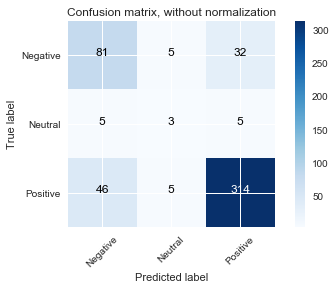

In [354]:
x_class = ['Negative', 'Neutral', 'Positive']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, classes=x_class, title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[0.69 0.04 0.27]
 [0.38 0.23 0.38]
 [0.13 0.01 0.86]]


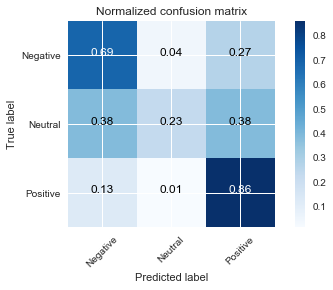

In [345]:
# Plot normalized confusion matrix
plot_confusion_matrix(cm, classes=x_class, normalize=True, title='Normalized confusion matrix')
plt.show()

http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
https://medium.com/tech-vision/introduction-to-confusion-matrix-classification-modeling-54d867169906

https://www.youtube.com/watch?v=FAr2GmWNbT0 
- evaluate 
- TP TN FP FN??? 
- 

- Accuracy?????

In [132]:
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

        0.0       0.61      0.69      0.65       118
        1.0       0.23      0.23      0.23        13
        2.0       0.89      0.86      0.88       365

avg / total       0.81      0.80      0.81       496



- Accuracy is the ratio of True positive + True negative values over the whole population (ratio of correctly predicted values) 

- These models all have relatively high scores however their accuracy may not be the best due to their highly unbalanced classes. for instance if we were to predict a spam email with the ratio of 100 spam emails and 900 non-spam. Then we can only say that the prediction is only 10% accurate.

- To increase the accruacy I would suggest resampling with replacement using boostrapping to balance the classes. For example spam emails could be upsampled to 500 and non spam down sampled to 500. 

### Predicting Probabilities for Classes and Roc Curve

In [299]:
Y_pp_mat =best_lr.predict_proba(X_test_mat)

In [319]:
print 'predicted probabilities for each class:' 
# Get the predicted probability vector and explicitly name the columns:
Y_pp = pd.DataFrame(Y_pp_mat, columns=['class_0_pp','class_1_pp', 'class_2_pp'])
# Y_pp['pred_class_thresh10'] = [1 if x >= 0.10 else 0 for x in Y_pp.class_1_pp.values]
Y_pp.head()


predicted probabilities for each class:


,class_0_pp,class_1_pp,class_2_pp
0,8.528513e-01,1.263707e-01,0.020778
1,3.001610e-02,3.504195e-10,0.969984
2,1.262890e-14,1.555196e-02,0.984448
3,6.544329e-05,1.453682e-06,0.999933
4,2.294635e-05,7.334036e-08,0.999977


In [267]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from scipy import interp


In [305]:
y_test_b.shape

(496, 3)

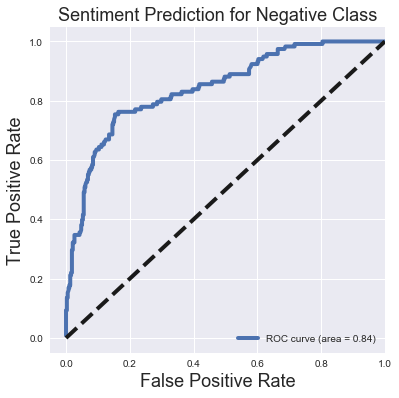

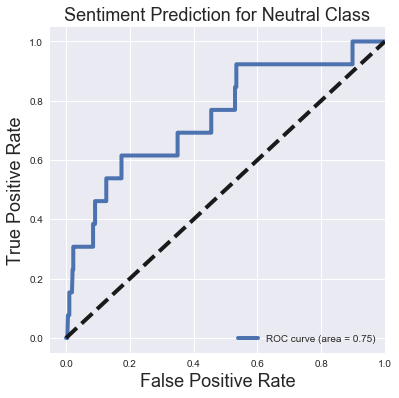

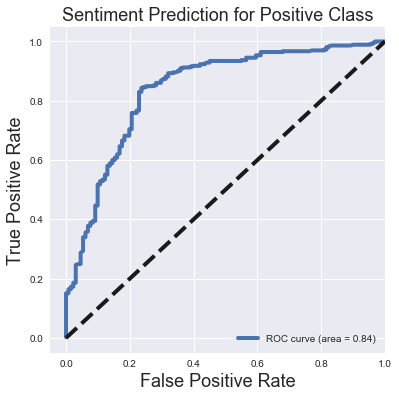

In [317]:
# Binarize the output
y_test_b = label_binarize(y_test, classes=[0, 1, 2])
n_classes_test = y_test_b.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], Y_pp_mat[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


x_class = ['Negative', 'Neutral', 'Positive']
# Plot of a ROC curve for a specific class
for i in range(n_classes):
        plt.figure(figsize=[6,6])
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i], linewidth=4)
        plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
        plt.xlim([-0.05, 1.0])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate', fontsize=18)
        plt.ylabel('True Positive Rate', fontsize=18)
        plt.title('Sentiment Prediction for '+str(x_class[i])+' Class', fontsize=18)
        plt.legend(loc="lower right")
        plt.show()


In [ ]:
print 'fpr\t', 'tpr\t', 'threshold'
print np.array(zip(fpr,tpr,threshold))
# higher recall remins high even with threshold value
# surface under curve area canoot be

# Let's analyse the features importances

In [92]:
coef_df = pd.DataFrame({
        'coef':best_lr.coef_[0]})
coef_df['abs_coef'] = np.abs(coef_df.coef)
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

coef_df.head()

,coef,abs_coef
471,0.556775,0.556775
343,0.474660,0.474660
322,-0.468406,0.468406
609,-0.456145,0.456145
210,-0.451457,0.451457


In [91]:
# Show non-zero coefs and predictors
# coef_df[coef_df.coef != 0]
len(coef_df[coef_df.coef != 0])

900

## Foursquare data
    - polarity : Target 2:positive, 1:neutral, 0:negative
    - words : preprocessed sentences
    - type : the tags of the words from lemmatizing 


TFDIF was fitted on the training data which will be used to transfomation the words in testing into a sparse matrix
Logistic Regressions best parameters which were fit for the training data will then predict sentiment (y_hat) for the transformed testing data.



---- logistic regression gave a good score in classifying the predictors but will try different classifiers to determine best accuracy score 


In [37]:
foursquare = pd.read_csv('./foursquare_clean.csv', encoding='utf8')
# foursquare = foursquare.dropna()
X = foursquare.lem_words

In [38]:
foursquare.shape

(5176, 7)

In [142]:
# transform the testing data
X_mat = tvec.transform(X)

# predictive probabilities

# y_hat_pp = best_lr.predict_proba(X_mat)
# y_hat_pp ???? can i ahve these on the foursquare data????

# Y_pp = pd.DataFrame(best_lr.predict_proba(X_test_mat), columns=['class_0_pp','class_1_pp', 'class_2_pp'])
# Y_pp.head(10) 

# probability in class 1 class 2 class 3 

In [162]:
foursquare['polarity_pred'] = best_lr.predict(X_mat)
lng=[]
lat=[]
for ll in foursquare['ll']:
    lnglat = ll.split(',')
    lng.append(lnglat[0])
    lat.append(lnglat[1])
foursquare['lng'] =lng
foursquare['lat'] =lat

# dummies = pd.get_dummies(foursquare.polarity_pred)
# dummies.columns = ['negative_0', 'neutral_1', 'positive_2']
# foursquare_all = pd.concat([foursquare, dummies])

foursquare.head()

,tips,ll,clean_stem,lem_words,lem_type,polarity_pred,lng,lat
0,Great fun to be had by everyone. The aquarium ...,"51.4409815123,-0.0613689422607","[great, fun, everyon, aquarium, worth, small, ...",great fun be have everyone aquarium be small f...,JJ NN VB VB NN NN VB JJ NN VB NN VB NN NN VB NN,2.0,51.4409815123,-0.0613689422607
1,Love this place my new local shop,"51.4669013,0.0528256","[love, thi, place, new, local, shop]",love place new local shop,VB NN JJ JJ NN,2.0,51.4669013,0.0528256
2,Enter our prize draw to win a family ticket to...,"51.501711493,-0.119767368051","[enter, prize, draw, win, famili, ticket, sea,...",prize draw win family ticket sea life don win ...,NN NN VB NN NN NN NN VB VB RB VB RB VB JJ NN V...,1.0,51.501711493,-0.119767368051
3,"If you're pressed for time, head to Hall 2 for...","51.5352960617,-0.155888708427","[press, time, head, hall, coral, amazonian, ex...",be press time head hall coral amazonian exhibi...,VB VB NN NN NN NN JJ NN NN VB RB JJ,0.0,51.5352960617,-0.155888708427
4,Sea lion shows at 12pm and 3pm daily,"51.3495168852,-0.315634863588","[sea, lion, show, daili]",sea lion show pm pm daily,NN NN VB NN NN RB,2.0,51.3495168852,-0.315634863588


In [150]:
foursquare.to_csv('foursquare_predictions.csv', header=True, index=False, encoding='UTF8')

In [166]:
df_neutral= foursquare[foursquare.polarity_pred ==1]
df_positive= foursquare[foursquare.polarity_pred ==2]
df_negative= foursquare[foursquare.polarity_pred ==0]

In [167]:
df_neutral.to_csv('fouresquare_predictions/df_neutral.csv', header=True, index=False, encoding='UTF8')
df_positive.to_csv('fouresquare_predictions/df_positive.csv', header=True, index=False, encoding='UTF8')
df_negative.to_csv('fouresquare_predictions/df_negative.csv', header=True, index=False, encoding='UTF8')

# Visualisations 

In [252]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [171]:
foursquare.groupby(['polarity_pred']).count()

,tips,ll,clean_stem,lem_words,lem_type,lng,lat
polarity_pred,,,,,,,
0.0,1181,1181,1181,1181,1181,1181,1181
1.0,89,89,89,89,89,89,89
2.0,3906,3906,3906,3906,3906,3906,3906


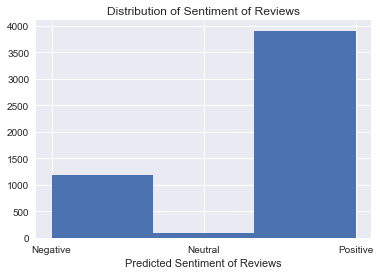

In [253]:
plt.hist(foursquare.polarity_pred, bins = 3, align= 'mid')
plt.xticks(range(3), ['Negative','Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment of Reviews')
plt.title('Distribution of Sentiment of Reviews')
plt.show()

# NOTES

https://stackoverflow.com/questions/40679883/scikit-learn-how-to-include-others-features-after-performed-fit-and-transform-o

In [ ]:
later, additonal work, 
- clustering
whats similar to logistic regression
-neural networks
from sklearn.neural_network import MLPClassifier 